In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt  
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns" , None)   

In [2]:
df = pd.read_csv("visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
# drop the case id
df = df.drop(columns = ['case_id'] , axis = 1)

In [6]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
# drop the rows where no_of_employees is less than equal 0 
df[df['no_of_employees'] <= 0].shape

(33, 11)

In [8]:
df = df[df['no_of_employees'] > 0]

In [9]:
df.shape

(25447, 11)

## Feature Engineering

**make a new col from yr_of_estab named company age**

In [10]:

from datetime import date

today_date = date.today()
current_year = today_date.year
current_year

2025

In [11]:
df['company_age'] = current_year - df['yr_of_estab']

In [12]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20


In [13]:
# drop yr_of_estab 
df = df.drop(columns = ['yr_of_estab'] , axis = 1)

In [14]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [15]:
numerical_features

['no_of_employees', 'prevailing_wage', 'company_age']

In [16]:
categorical_features

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

#### Do the X , y split

In [17]:
X = df.drop(columns = ['case_status'] , axis = 1)
y = df['case_status']

In [18]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,20


In [19]:
y

0           Denied
1        Certified
2           Denied
3           Denied
4        Certified
           ...    
25475    Certified
25476    Certified
25477    Certified
25478    Certified
25479    Certified
Name: case_status, Length: 25447, dtype: object

### Feature Transformation

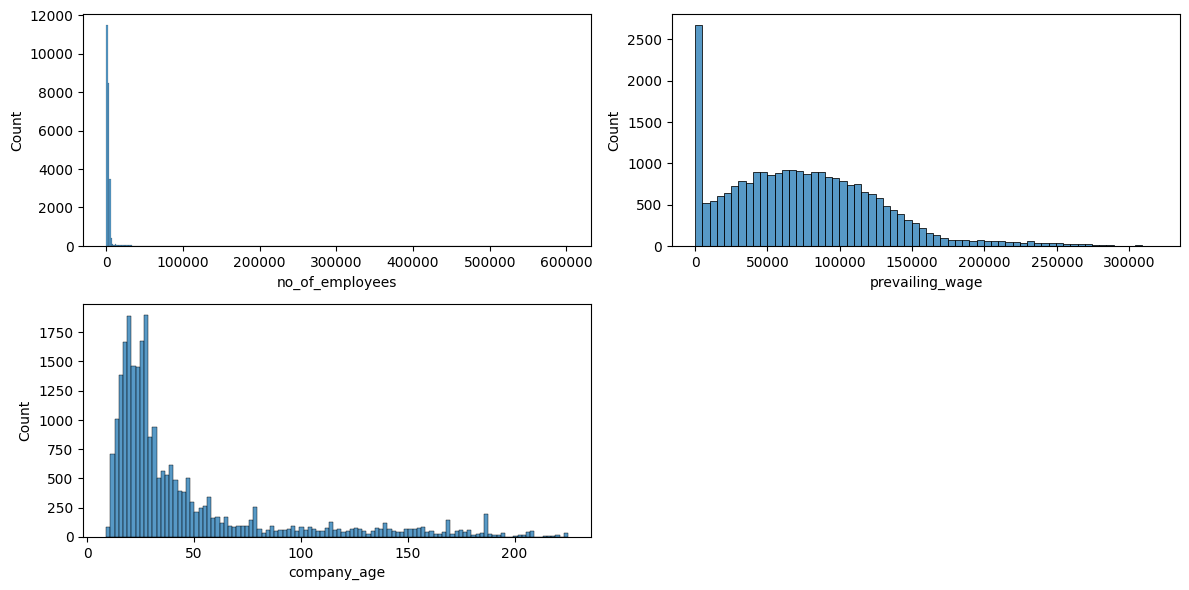

In [20]:
# distribution of data before scaling
plt.figure(figsize = (12 , 6))

for i , col in enumerate(['no_of_employees','prevailing_wage','company_age']): 
    plt.subplot(2 , 2 , i + 1)
    sns.histplot(x = X[col])
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

In [22]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


In [23]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


In [24]:
X[continuous_features].skew(axis = 0 , skipna = True)

no_of_employees    12.257842
prevailing_wage     0.756078
company_age         2.036167
dtype: float64

### Apply Power Transformer

In [25]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = "yeo-johnson")
transform_features = ['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [26]:
type(X_copy)

numpy.ndarray

In [27]:
X_copy = pd.DataFrame(X_copy, columns = transform_features)
X_copy.head()

,company_age,no_of_employees
0,-0.955695,1.615669
1,-0.467178,0.212631
2,-1.078500,2.464726
3,1.630460,-2.417466
4,-0.738283,-0.430889


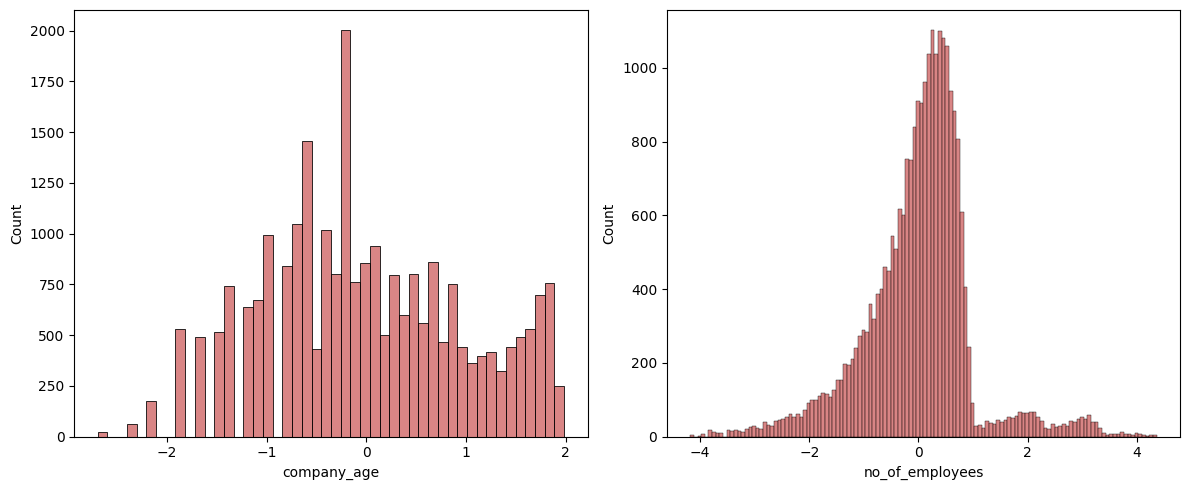

In [28]:
plt.figure(figsize = (12, 5))

for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [32]:
X_copy.skew(axis = 0 , skipna = True)

company_age        0.112396
no_of_employees   -0.022003
dtype: float64

In [33]:
X['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [34]:
num_features = list(X.select_dtypes(exclude = "object").columns)

In [35]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,20


## Preprocessing using Column Transformer

In [39]:
ordinal_columns = ['education_of_employee' , 'has_job_experience' , 'requires_job_training' , 'full_time_position']
onehot_columns = ['continent' , 'unit_of_wage' , 'region_of_employment']
transform_columns = ['no_of_employees' , 'company_age']

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler , OrdinalEncoder , PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

In [38]:
numerical_transformer = StandardScaler()
oneHot_transformer = OneHotEncoder()
ordinal_transformer = OrdinalEncoder()

In [40]:
transform_pipeline = Pipeline(steps = [
    ('transformer' , PowerTransformer(method = 'yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder" , oneHot_transformer , onehot_columns), 
        ("Ordinal_Encoder" , ordinal_transformer , ordinal_columns), 
        ("StandardScaler" , numerical_transformer , num_features)
    ]
)

In [41]:
X = preprocessor.fit_transform(X)

In [42]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38610953,
        -1.3986082 , -0.65130185],
       [ 0.        ,  1.        ,  0.        , ..., -0.14251712,
         0.16957924, -0.53333587],
       [ 0.        ,  1.        ,  0.        , ...,  1.69363156,
         0.91873403, -0.67489505],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19891386,
         1.35988298,  1.63723825],
       [ 0.        ,  1.        ,  0.        , ..., -0.16409728,
         0.22124643,  2.17988178],
       [ 0.        ,  1.        ,  0.        , ..., -0.10831212,
        -0.06799118,  0.4575784 ]], shape=(25447, 22))

## Handle Imbalance Issue

In [43]:
from imblearn.combine import SMOTETomek , SMOTEENN

# Resampling the minority class. The strategy can be changed as required. 
smt = SMOTEENN(random_state = 42 , sampling_strategy = "minority")

X_res , y_res = smt.fit_resample(X , y)

In [44]:
X.shape

(25447, 22)

In [45]:
X_res.shape

(16572, 22)

In [49]:
from collections import Counter

Counter(y_res)

Counter({'Denied': 8826, 'Certified': 7746})

## Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_res , y_res , test_size = 0.2 , random_state = 42)

X_train.shape , X_test.shape

((13257, 22), (3315, 22))

In [51]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [52]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [53]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [59]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X , y , models): 

    # Do the train test split 
    X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

    models_list = []
    accuracy_list = [] 
    auc_list = []

    for i in range(len(list(models))): 
        # extract the model object and model name 
        model = list(models.values())[i]
        model_name = list(models.keys())[i]

        # do the train 
        model.fit(X_train , y_train)

        # Do the prediction on training data
        y_train_pred = model.predict(X_train)  
        # Do the prediction on test data
        y_test_pred = model.predict(X_test)

        # performance on training data
        model_train_accuracy, model_train_f1,model_train_precision,model_train_recall,model_train_rocauc_score = evaluate_clf(y_train ,y_train_pred)
        # performance on test data
        model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        print(f"Model: {model_name}")
        models_list.append(model_name)
        
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc_list.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    # make the report 
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training

In [56]:
y_res.value_counts()

case_status
Denied       8826
Certified    7746
Name: count, dtype: int64

In [57]:
y_res = np.where(y_res =='Denied', 1,0)

In [60]:
base_model_report = evaluate_models(X = X_res, y = y_res , models = models)

Model: Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9496
- F1 score: 0.9529
- Precision: 0.9580
- Recall: 0.9478
- Roc Auc Score: 0.9498


Model: Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9279
- F1 score: 0.9325
- Precision: 0.9381
- Recall: 0.9270
- Roc Auc Score: 0.9280


Model: Gradient Boosting
Model performance for Training set
- Accuracy: 0.8953
- F1 score: 0.9011
- Precision: 0.9049
- Recall: 0.8972
- Roc Auc Score: 0.8952
----------------------------------
Model performance for Test set
- Accuracy: 0.8950
- F1 score: 0.9009
- Precision: 0.9149
- Recall: 0.8872
- Roc Auc Score: 0.8957


Model: Logistic Regression
Mod

In [61]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.949623
4,K-Neighbors Classifier,0.942986
6,CatBoosting Classifier,0.936953
5,XGBClassifier,0.932127
1,Decision Tree,0.927903
2,Gradient Boosting,0.895023
7,Support Vector Classifier,0.888386
8,AdaBoost Classifier,0.869985
3,Logistic Regression,0.742685


## Hyper Parameter tuning for top-5 models

In [62]:
#Initialize few parameter for Hyperparamter tuning


# XGBoost parameters
xgboost_params = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300]
}

# Random Forest parameters
rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [50, 100, 200, 300],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# K-Nearest Neighbors parameters
knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9, 11],
    "p": [1, 2]  # 1: Manhattan, 2: Euclidean
}

# CatBoost parameters
catboost_params = {
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "iterations": [100, 200, 300],
    "l2_leaf_reg": [1, 3, 5, 7]
}

# Decision Tree parameters
dt_params = {
    "max_depth": [None, 5, 10, 15, 20],
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

In [63]:
# Models list for Hyperparameter tuning
gridcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RandomForest", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params), 
    ("CatBoost" , CatBoostClassifier(verbose=False) , catboost_params), 
    ("DecisionTreeClassifier" , DecisionTreeClassifier() , dt_params)
]

## Do the tuning

In [64]:
from sklearn.model_selection import GridSearchCV

model_param = {}

for model_name , model_obj , params in gridcv_models: 
    grid = GridSearchCV(
        estimator = model_obj, 
        param_grid = params, 
        cv = 5, 
        verbose = 2 , 
        n_jobs = -1
        )

    grid.fit(X_res , y_res)
    model_param[model_name] = grid.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 405 candidates, totalling 2025 fits


In [65]:
for model_name in model_param: 
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for XGBoost -------------------
{'learning_rate': 0.2, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 300}
---------------- Best Params for RandomForest -------------------
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
---------------- Best Params for KNN -------------------
{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
---------------- Best Params for CatBoost -------------------
{'depth': 10, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
---------------- Best Params for DecisionTreeClassifier -------------------
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [66]:
model_param

{'XGBoost': {'learning_rate': 0.2,
  'max_depth': 9,
  'min_child_weight': 1,
  'n_estimators': 300},
 'RandomForest': {'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 'KNN': {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'},
 'CatBoost': {'depth': 10,
  'iterations': 300,
  'l2_leaf_reg': 1,
  'learning_rate': 0.2},
 'DecisionTreeClassifier': {'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2}}

## Retraining the top-5 model with best Params

In [67]:
from sklearn.metrics import roc_auc_score , roc_curve

In [79]:
best_models = {
    "Random Forest Classifier" : RandomForestClassifier(**model_param['RandomForest']), 
    "KNN Classifier" : KNeighborsClassifier(**model_param['KNN']),
    "XGboost Classifier" : XGBClassifier(**model_param['XGBoost']), 
    "Catboost Classifier" : CatBoostClassifier(**model_param['CatBoost'] , verbose = False), 
    "DecisionTree Classifier" : DecisionTreeClassifier(**model_param['DecisionTreeClassifier']),
}

In [80]:
tuned_report = evaluate_models(X = X_res , y = y_res , models = best_models)

Model: Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9526
- F1 score: 0.9557
- Precision: 0.9603
- Recall: 0.9512
- Roc Auc Score: 0.9528


Model: KNN Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9747
- F1 score: 0.9766
- Precision: 0.9691
- Recall: 0.9843
- Roc Auc Score: 0.9739


Model: XGboost Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9454
- F1 score: 0.9492
- Precision: 0.9500
- Recall: 0.9484
- Roc Auc Score: 0.9452


Model: Catboost C

In [81]:
tuned_report

,Model Name,Accuracy
1,KNN Classifier,0.974661
3,Catboost Classifier,0.956259
0,Random Forest Classifier,0.952640
2,XGboost Classifier,0.945400
4,DecisionTree Classifier,0.924284


In [82]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model.fit(X_train , y_train)

,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [83]:
y_pred = best_model.predict(X_test)

In [84]:
score = accuracy_score(y_test , y_pred)
cr = classification_report(y_test , y_pred)

In [85]:
print(f"Accuracy Score: {score}")
print(cr)

Accuracy Score: 0.9746606334841629
              precision    recall  f1-score   support

   Certified       0.98      0.96      0.97      1533
      Denied       0.97      0.98      0.98      1782

    accuracy                           0.97      3315
   macro avg       0.98      0.97      0.97      3315
weighted avg       0.97      0.97      0.97      3315



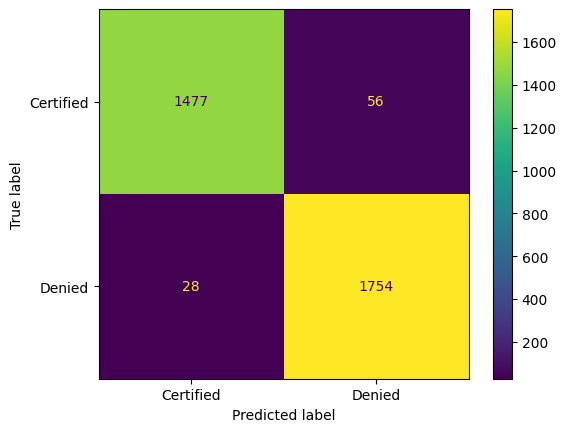

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 97.466%